In [60]:
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
df.shape

(244, 7)

In [63]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [64]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [66]:
df_numeric = df.select_dtypes(include="number")
df_numeric

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


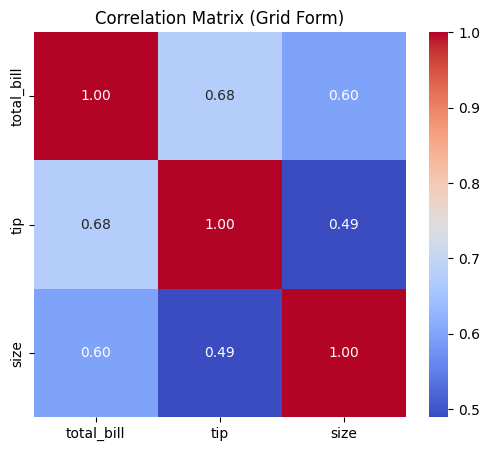

In [67]:
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Grid Form)")
plt.show()

In [68]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [69]:
col = ['sex', 'smoker', 'day', 'time']
for i in col:
    print(f"{i} :", df[i].unique())
    print()   

sex : ['Female', 'Male']
Categories (2, object): ['Male', 'Female']

smoker : ['No', 'Yes']
Categories (2, object): ['Yes', 'No']

day : ['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

time : ['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']



In [70]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [71]:
for i in col:
    df[i] = le.fit_transform(df[i])

In [72]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [73]:
col = ['sex', 'smoker', 'day', 'time','size']
for i in col:
    print(f"{i} :", df[i].unique())

print()

col_num = ['total_bill', 'tip','day','size']
print("numeric_unique")
for i in col_num:
    print(f"{i} :", df[i].nunique()) 

sex : [0 1]
smoker : [0 1]
day : [2 1 3 0]
time : [0 1]
size : [2 3 4 1 6 5]

numeric_unique
total_bill : 229
tip : 123
day : 4
size : 6


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

col_num = [['total_bill','day','size']]

In [75]:
for i in col_num:
    df[i] = scaler.fit_transform(df[i])

In [77]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,1.01,0,0,0.279158,0,-0.600193
1,-1.063235,1.66,1,0,0.279158,0,0.453383
2,0.137780,3.50,1,0,0.279158,0,0.453383
3,0.438315,3.31,1,0,0.279158,0,-0.600193
4,0.540745,3.61,0,0,0.279158,0,1.506958


In [80]:
X = df.drop("tip", axis=1)
y = df["tip"]

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [82]:
#linear regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [83]:
linear.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [85]:
y_pred = linear.predict(X_test)
y_pred

array([2.98575218, 1.94061325, 3.90398163, 3.84498032, 2.1680261 ,
       2.60582699, 3.65155039, 2.31090817, 2.50534068, 2.3509249 ,
       2.83515653, 2.13537228, 2.1389529 , 2.2854076 , 1.84415015,
       3.13003355, 2.9775778 , 3.14430016, 2.63638097, 5.76225288,
       3.51539752, 3.30404608, 2.24355298, 2.02073543, 3.09625338,
       2.26938652, 2.0815602 , 3.27434496, 3.14662672, 6.60403271,
       4.93408016, 1.65891577, 3.2774898 , 2.83817187, 2.91871607,
       3.8815044 , 2.0688538 , 5.47790762, 2.37480412, 3.06180769,
       2.11094147, 2.50259602, 3.36699633, 2.29479093, 1.95079059,
       0.94708728, 1.89400456, 3.11987541, 1.8813126 ])

In [87]:
y_test.head(5)

24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
Name: tip, dtype: float64

In [89]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.4441368826121955